**Importing all the necessary libraries**

In [2]:
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Adding my credentials for authentication to use Twitter**

**There are stored in a seperate file so they remain unseen**

In [ ]:
#Credentials
from credentials import * 

def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

**Extracting the Tweets from Imran Khans account**

In [ ]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="ImranKhanPTI", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

بیروت میں ہونےوالے بڑےدھماکوں، قیمتی جانوں کےضیاع اور ہزاروں شہریوں کےزخمی ہونےکےبارےمیں جان کرنہایت رنجیدہ ہوں۔ان… https://t.co/1vbCzzqCav

Deeply pained to hear of the massive explosions in Beirut with precious lives lost &amp; thousand injured.We stand in s… https://t.co/5MRHeQQMG8

ہم نے اہلِ کشمیر کی امنگوں اور اقوامِ متحدہ کی سلامتی کونسل کی قراردادوں کے حوالے سے اپنے عزائم و مؤقف کو کل جاری ہ… https://t.co/4Yh2cYkByT

ہندوستان نےمقبوضہ جموں و کشمیر پرغیر قانونی قبضے کے ذریعے جن کشمیریوں کی آواز گُل کرنے کی کوشش کی میں بطورِ سفیر ان… https://t.co/ckRsPpdgYQ

یومِ استحصال کےموقع پراہلِ کشمیرسےاظہارِ یکجہتی کیلئےمیں آج آزاد جموں وکشمیر کی اسمبلی سےمخاطب ہوں گا۔گزشتہ برس 5 ا… https://t.co/AMF7mfXWHQ



**Adding them to a Dataframe for analysis**

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(df.head(10))

,Tweets
0,بیروت میں ہونےوالے بڑےدھماکوں، قیمتی جانوں کےض...
1,Deeply pained to hear of the massive explosion...
2,ہم نے اہلِ کشمیر کی امنگوں اور اقوامِ متحدہ کی...
3,ہندوستان نےمقبوضہ جموں و کشمیر پرغیر قانونی قب...
4,یومِ استحصال کےموقع پراہلِ کشمیرسےاظہارِ یکجہت...
5,We have also depicted the aspirations of the K...
6,I will continue to be an ambassador for all Ka...
7,I will address the AJK Assembly today to show ...
8,بلوکی، پنجاب میں 10 ارب درخت اگانےکی مہم (#10B...
9,"Baloki, Punjab: Massive change visible a yr af..."


In [ ]:
print(tweets[0].user)

**Adding attributes of tweet to dataframe**

In [ ]:
df['len']  = np.array([len(tweet.text) for tweet in tweets])
df['Language']   = np.array([tweet.lang for tweet in tweets])
df['Date'] = np.array([tweet.created_at for tweet in tweets])
df['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
df['ReTweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets
195,حالیہ غیرقانونی اقدام کاتو وقت بھی قابل مذمت ہ...,139,ur,2020-04-02 14:44:01,9722,2813
196,ہم ہندوبالادستی کےایجنڈےپرکاربند نسل پرست مودی...,140,ur,2020-04-02 14:44:01,28997,7039
197,We stand with the Kashmiris in rejecting this ...,139,en,2020-04-02 13:48:44,15796,5017
198,Timing of this latest illegal action is partic...,140,en,2020-04-02 13:48:44,15205,4811
199,We strongly condemn the racist Hindutva Suprem...,140,en,2020-04-02 13:48:43,43059,11626


**Defining function for sentiment analysis**

In [ ]:
from textblob import TextBlob
import re

def find_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
df['Sentiment'] = np.array([ find_sentiment(tweet) for tweet in df['Tweets'] ])

In [5]:
df = pd.read_csv("TwitterImran.csv", index_col=0)

In [6]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
195,حالیہ غیرقانونی اقدام کاتو وقت بھی قابل مذمت ہ...,139,ur,2020-04-02 14:44:01,9722,2813,0
196,ہم ہندوبالادستی کےایجنڈےپرکاربند نسل پرست مودی...,140,ur,2020-04-02 14:44:01,28997,7039,0
197,We stand with the Kashmiris in rejecting this ...,139,en,2020-04-02 13:48:44,15796,5017,1
198,Timing of this latest illegal action is partic...,140,en,2020-04-02 13:48:44,15205,4811,1
199,We strongly condemn the racist Hindutva Suprem...,140,en,2020-04-02 13:48:43,43059,11626,-1


**Use of languages, also represented in a pie chart**

In [7]:
lang = df['Language'].value_counts()
lang

en    101
ur     99
Name: Language, dtype: int64

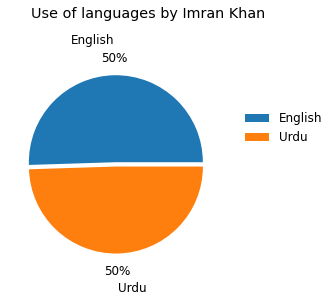

In [8]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=12

labels = ['English', 'Urdu']
ax.pie(lang, explode=(0.05,0), labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4, rotatelabels=False)

ax.set_title("Use of languages by Imran Khan", pad=40, x=0.65)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

**Filtering 20% of most liked Tweets**

Plotting a pie chart shows most of his topped liked Tweets are in English

In [9]:
#Top 20% Tweets likeds
themes = df.sort_values('Likes', ascending=False).head(40)
liked_lang = themes['Language'].value_counts()

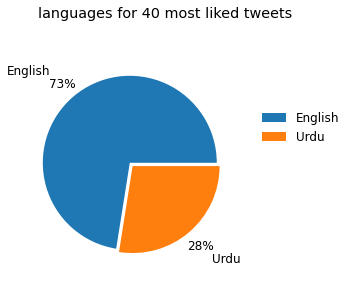

In [11]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=12

labels = ['English', 'Urdu']
ax.pie(liked_lang, explode=(0.05,0), labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4, rotatelabels=False)

ax.set_title("languages for 40 most liked tweets", pad=40, x=0.65)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

**Average length of Tweet**

In [15]:
avg = np.mean(df['len'])
allowance = avg/280*100
allowance = ("%.2f" % allowance)
print(f"The average length of the tweets is {avg} which is {allowance}% the maximum length allowed.")

The average length of the tweets is 139.105 which is 49.68% the maximum length allowed.


In [16]:
most_liked = df[df.Likes == np.max(df['Likes'])].Tweets
most_retweeted = df[df.ReTweets == np.max(df['ReTweets'])].Tweets

**Mosted liked Tweet**

In [17]:
print(f"The most liked Tweet is:\n {most_liked}")

The most liked Tweet is:
 93    Wishing a special Eid Mubarak to Kashmiris in ...
Name: Tweets, dtype: object


**Most retweeted tweet**

In [18]:
print(f"The most retweeted Tweet is:\n {most_retweeted}")

The most retweeted Tweet is:
 193    The RSS inspired BJP leadership in the 21st ce...
Name: Tweets, dtype: object


In [19]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y/%m/%d %H:%M:%S.%f')
df.dtypes

Tweets               object
len                   int64
Language             object
Date         datetime64[ns]
Likes                 int64
ReTweets              int64
Sentiment             int64
dtype: object

**Plotting likes and retweet against time**

In [20]:
time_liked = pd.Series(df['Likes'].values, index=df['Date'])
time_retweet = pd.Series(df['ReTweets'].values, index=df['Date'])

Text(0.5, 1.0, 'Distribution of likes and retweets over time')

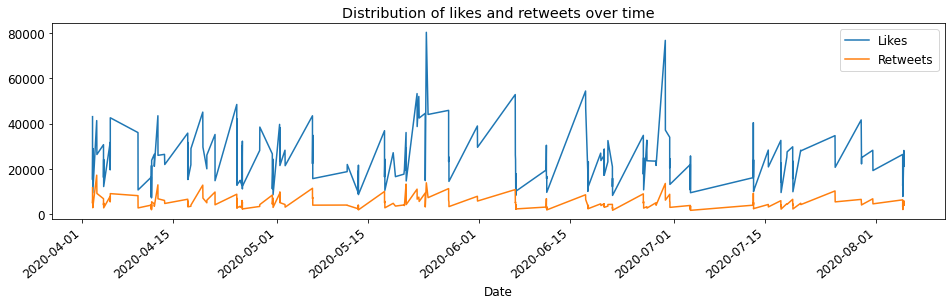

In [38]:
time_liked.plot(figsize=(16,4), label="Likes", legend=True)
time_retweet.plot(figsize=(16,4), label="Retweets", legend=True);
plt.xticks(rotation=40)
plt.title('Distribution of likes and retweets over time')

**Sorting according to the likes helps us explain the two large peaks. The first one is for his Tweet on Eid and the second is the day of the attack on the Karachi Stock Exchange**

In [22]:
Total_likes = df['Likes'].sum()
Total_retweets = df['ReTweets'].sum()

In [23]:
df.sort_values('Likes', ascending=False).head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
93,Wishing a special Eid Mubarak to Kashmiris in ...,140,en,2020-05-23 21:24:01,80308,13840,1
44,I salute our brave police &amp; security perso...,135,en,2020-06-29 15:04:20,76742,13551,1
70,Saddened to learn of the passing of Tariq Aziz...,140,en,2020-06-17 08:55:10,54383,8555,-1
101,Shocked &amp; saddened by the PIA crash. Am in...,148,en,2020-05-22 11:10:56,53236,11034,-1
85,This poem by Iqbal reflects how I try to lead ...,140,en,2020-06-06 13:25:00,52813,10845,0


The total number of likes are  4766270
The total number of retweets are  1027643




<BarContainer object of 1 artists>

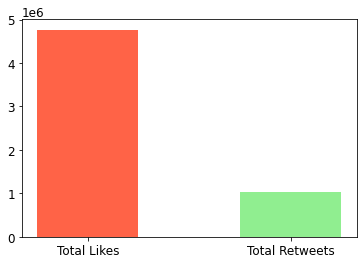

In [24]:
ax = plt.subplot()
print('The total number of likes are ', Total_likes)
print('The total number of retweets are ', Total_retweets)
print('\n')
ax.bar('Total Likes', Total_likes, width=0.5, color='tomato', align='center')
ax.bar('Total Retweets', Total_retweets, width=0.5, color='lightgreen', align='center')

In [47]:
Eng_Tweets = df[df['Language'] == 'en']
len(Eng_Tweets)
Eng_Tweets.reset_index(drop=True, inplace=True)

In [48]:
#Sentiment Analysis
pos_tweets = [ tweet for index, tweet in enumerate(Eng_Tweets['Tweets']) if Eng_Tweets['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(Eng_Tweets['Tweets']) if Eng_Tweets['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(Eng_Tweets['Tweets']) if Eng_Tweets['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets)/101*100
neu_tweets_perc = len(neu_tweets)/101*100
neg_tweets_perc = len(neg_tweets)/101*100

**Sentiment Analysis**

Text(0, 0.5, 'Percentage')

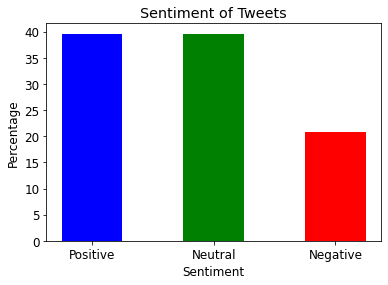

In [49]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')
plt.title('Sentiment of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

In [27]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
df['Tweets Cleaned'] = df.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()
Eng_Tweets = df[df['Language'] == 'en']
Eng_Tweets

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
1,Deeply pained to hear of the massive explosion...,144,en,2020-08-05 07:10:12,28125,5894,1,Deeply pained to hear of the massive explosion...
5,We have also depicted the aspirations of the K...,143,en,2020-08-05 02:55:49,12560,3201,0,We have also depicted the aspirations of the K...
6,I will continue to be an ambassador for all Ka...,140,en,2020-08-05 02:55:48,13489,3479,-1,I will continue to be an ambassador for all Ka...
7,I will address the AJK Assembly today to show ...,140,en,2020-08-05 02:55:48,26364,6305,0,I will address the AJK Assembly today to show ...
9,"Baloki, Punjab: Massive change visible a yr af...",140,en,2020-07-31 12:33:52,28210,6779,0,"Baloki, Punjab: Massive change visible a yr af..."
...,...,...,...,...,...,...,...,...
191,"In the subcontinent, with a high rate of pover...",140,en,2020-04-04 06:19:04,30673,6805,-1,"In the subcontinent, with a high rate of pover..."
193,The RSS inspired BJP leadership in the 21st ce...,140,en,2020-04-03 05:12:04,41314,17207,0,The RSS inspired BJP leadership in the 21st ce...
197,We stand with the Kashmiris in rejecting this ...,139,en,2020-04-02 13:48:44,15796,5017,1,We stand with the Kashmiris in rejecting this ...
198,Timing of this latest illegal action is partic...,140,en,2020-04-02 13:48:44,15205,4811,1,Timing of this latest illegal action is partic...


**WordCloud using Pakistani flag as template**

In [29]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "now", "go", "talk", "many", "today"])

mask = np.array(Image.open("/content/Flag.png"))

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(Eng_Tweets['Tweets Cleaned'].str.cat())

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

FileNotFoundError: ignored

**Wordcloud without template**

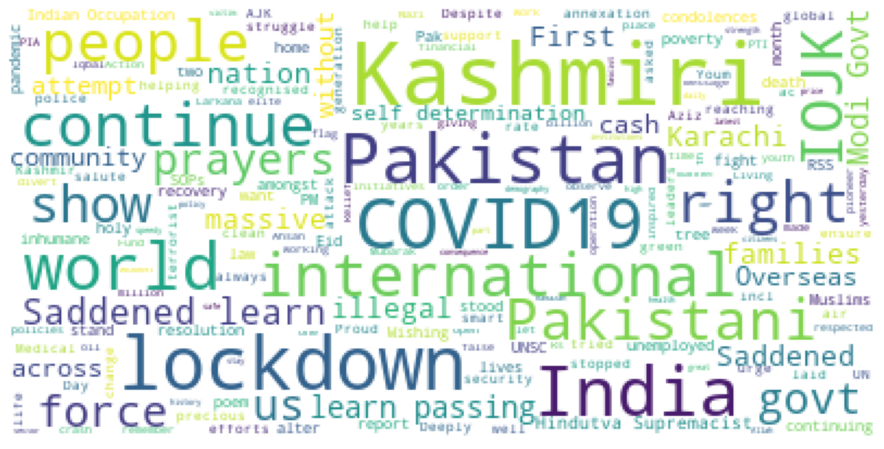

In [30]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "must", "now", "go", "talk", "many", "today"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, colormap="viridis", background_color="White", max_words=500).generate(Eng_Tweets['Tweets Cleaned'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()

In [31]:
df.dtypes

Tweets                    object
len                        int64
Language                  object
Date              datetime64[ns]
Likes                      int64
ReTweets                   int64
Sentiment                  int64
Tweets Cleaned            object
dtype: object

In [32]:
df['Hour_Tweeted'] = df['Date'].dt.hour

In [33]:
tweetTime = df['Hour_Tweeted'].value_counts()
tweetTime = tweetTime.sort_index()
tweetTime.dtype

dtype('int64')

**Time of day Imran Khan Tweets**

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


Text(0, 0.5, 'Number of Tweets')

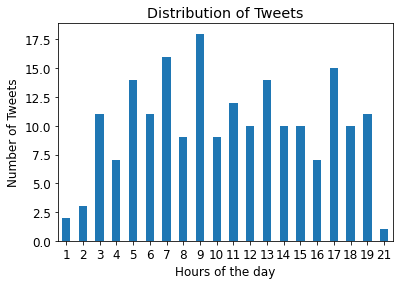

In [36]:
ys = []
for i in range(0,21,2):
  ys.append(i)
print(ys)
tweetTime.plot(kind='bar', y=ys)
plt.xticks(rotation=0)
plt.title('Distribution of Tweets')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Tweets')

**Correlation between Likes and ReTweets**

In [35]:
#Correlation
df['Likes'].corr(df['ReTweets'])

0.8417739924017382

# COVID-19

In [51]:
Eng_Tweets = df[df['Language'] == 'en']
len(Eng_Tweets)

101

In [52]:
covid = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID')]
covid_19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID-19')]
covid19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID19')]
pandemic = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('pandemic')]
coronavirus = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('coronavirus')]
lockdown = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('lockdown')]
covid_df = pd.concat([covid, covid_19, covid19, pandemic,coronavirus, lockdown])

In [53]:
print('Total number of entries related to covid are', len(covid_df))

Total number of entries related to covid are 29


In [54]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 10


In [55]:
covid_df.drop_duplicates(subset ="Tweets", inplace = True) 

In [56]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 0


In [57]:
print('Total number of entries for the given words, after removing duplicates, are', len(covid_df))

Total number of entries for the given words, after removing duplicates, are 19


In [58]:
covid_df.reset_index(drop=True, inplace=True)

**Sentiment Analysis on just his Covid related tweets**

In [59]:
#Sentiment Analysis
pos_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] > 0]
neu_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] == 0]
neg_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets_covid)/19*100
neu_tweets_perc = len(neu_tweets_covid)/19*100
neg_tweets_perc = len(neg_tweets_covid)/19*100

Text(0, 0.5, 'Percentage')

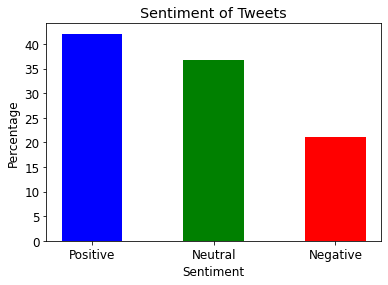

In [60]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')
plt.title('Sentiment of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

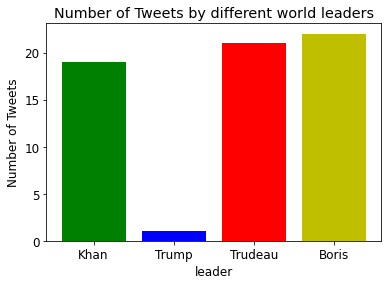

In [62]:
dictionary = {'Khan': 19, 'Trump' : 1, 'Trudeau': 21, 'Boris': 22}
keys = dictionary. keys()
values = dictionary. values()
plt.bar(keys, values, color='gbry')

plt.title('Number of Tweets by different world leaders')
plt.xlabel('leader')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)